In [112]:
import numpy as np 
import pandas as pd 
import datetime as dt
import sklearn as sk
import itertools
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.style.use('seaborn')
from matplotlib.offsetbox import AnchoredText
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
%matplotlib inline 

df = pd.read_csv('seaice.csv')
df.drop('Source Data', axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df.index = df['Date'].values

north = df[df['hemisphere'] == 'north']
south = df[df['hemisphere'] == 'south']

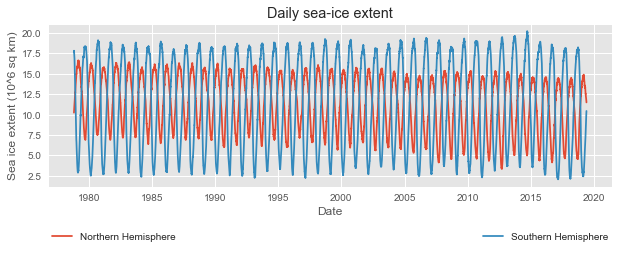

In [102]:
plt.figure(figsize=(9,3))
plt.plot(north.index,north['Extent'], label='Northern Hemisphere')
plt.plot(south.index,south['Extent'], label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent');

In [103]:
#From this data we can see there there are independent maximum and minimum for the northern  
#and southern hemisphere data sets, as is to be expected from the change of season. 
#In addition to this, there is on average more sea-ice in the southern hemisphere than the north. 

(1977.0, 2016.0)

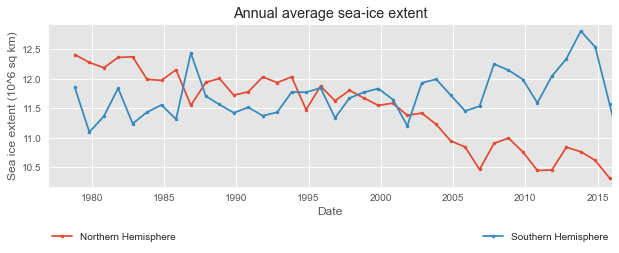

In [104]:
# resample raw data into annual averages
northyear = north.resample('12M').mean()
southyear = south.resample('12M').mean()

# remove the initial and final item as they aer averaged incorrectly (also indexes seem bad)
northyear = northyear[1:-1]
southyear = southyear[1:-1]

plt.figure(figsize=(9,3))
plt.plot(northyear.Year,northyear['Extent'], marker = '.', label='Northern Hemisphere')
plt.plot(southyear.Year,southyear['Extent'], marker = '.', label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Annual average sea-ice extent')
plt.xlim(1977, 2016)




In [105]:
#Here, we can observe the general trend that there has been a steady decrease in the extent of sea-ice in the northern hemisphere, 
#the extent of sea-ice in the southern hemisphere was relatively constant until the early 2000s, 
#and since then has been increasing, at first this seemed to be a very strange result, 
#This has been known for some time and is due to a large number of complicated factors.

In [106]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df.index = df['Date'].values
NHem = df[df['hemisphere'] == 'north']
SHem = df[df['hemisphere'] == 'south']

In [107]:
# Seasonal March of Sea Ice Extent over Years
NHem_month, SHem_month = NHem.resample('1M').mean(), SHem.resample('1M').mean()
for monthly,Hem,Hem_name in zip([NHem_month,SHem_month],[NHem,SHem],['North / Arctic','South / Antarctic']):
    monthly['Month'] = monthly['Month'].apply(lambda x:int(x))
    monthly['Year'] = monthly['Year'].apply(lambda x:int(x))

Text(0.5, 1.0, 'South/Antarctic | February mean')

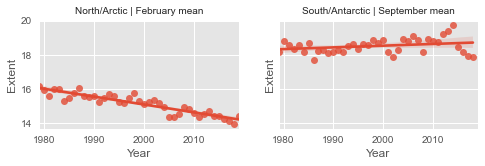

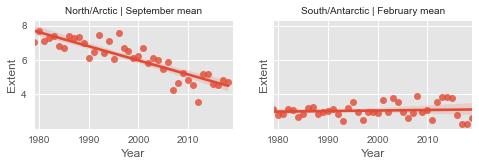

In [108]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex='row',sharey='row',figsize=(7,2))
sns.regplot(x="Year", y="Extent", data=NHem_month[NHem_month.Month==2],ax=ax1)
ax1.set_title('North/Arctic | February mean',size=10)
sns.regplot(x="Year", y="Extent", data=SHem_month[SHem_month.Month==9],ax=ax2)
ax2.set_title('South/Antarctic | September mean',size=10)

fig2, ((ax3, ax4)) = plt.subplots(1, 2, sharex='row',sharey='row',figsize=(7,2))
sns.regplot(x="Year", y="Extent", data=NHem_month[NHem_month.Month==9],ax=ax3)
ax3.set_title('North/Arctic | September mean',size=10)
sns.regplot(x="Year", y="Extent", data=SHem_month[SHem_month.Month==2],ax=ax4)
ax4.set_title('South/Antarctic | February mean',size=10)

#Observations:
#Arctic (Northern hemisphere) sea ice has a robust decreasing trend in both February (maximum extent) and September (minimum extent).
#Antarctic (Southern hemisphere) sea ice has a weakly increasing trend in both February (minimum extent) and September (maximum extent).
#The minimum sea ice extent annually for the Arctic is decreasing.
#Comparing the rates of change between the hemisphere, 
#the Arctic sea ice is shrinking at a much faster rate than the weak increase in Antarctic sea ice.

In [109]:
x = df['Year']
y = df['Extent']
p = np.polyfit(x,y,5)
f = np.polyval(p,x)

In [110]:
x2 = np.arange(2020,2100,5)
f2 = np.polyval(p,x2)
pred = list(zip(x2, f2))  
df2 = pd.DataFrame(pred, columns=['Year', 'Extent'])
pred_df = df.append(df2, ignore_index=True)
pred_df.tail()

,Year,Month,Day,Extent,Missing,hemisphere,Date
26365,2075,NaN,NaN,-265.663204,NaN,NaN,NaT
26366,2080,NaN,NaN,-344.888435,NaN,NaN,NaT
26367,2085,NaN,NaN,-439.962958,NaN,NaN,NaT
26368,2090,NaN,NaN,-552.878746,NaN,NaN,NaT
26369,2095,NaN,NaN,-685.749265,NaN,NaN,NaT


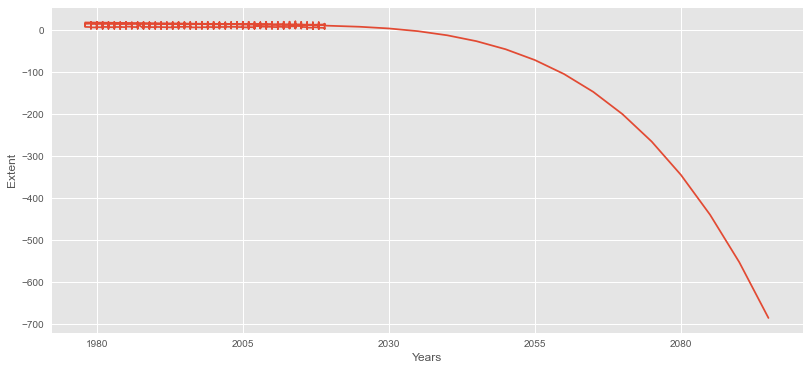

In [111]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(pred_df['Year'], pred_df['Extent'])
ax.set_ylabel('Extent')
ax.set_xlabel('Years')
ax.set_xticks(np.arange(1980,2100,25))
plt.show()